## Following from: https://www.youtube.com/watch?v=PaCmpygFfXo

In [129]:
import torch
import torch.nn.functional as F


In [4]:
words = open("names.txt", "r").read().splitlines()

In [5]:
max(len(w) for w in words)

15

In [6]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
b = {} # bigram count
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [8]:
sorted(b.items(), key=lambda kv:kv[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [31]:
chars = sorted(list(set(''.join(words)))) 
s2i = {s: i + 1 for i, s in enumerate(chars)}
s2i["."] = 0
i2s = {i: s for s, i in s2i.items()}

i2s

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [88]:
N = torch.zeros(27, 27)

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s2i[ch1]
        idx2 = s2i[ch2]
        N[idx1, idx2] += 1

(-0.5, 26.5, 26.5, -0.5)

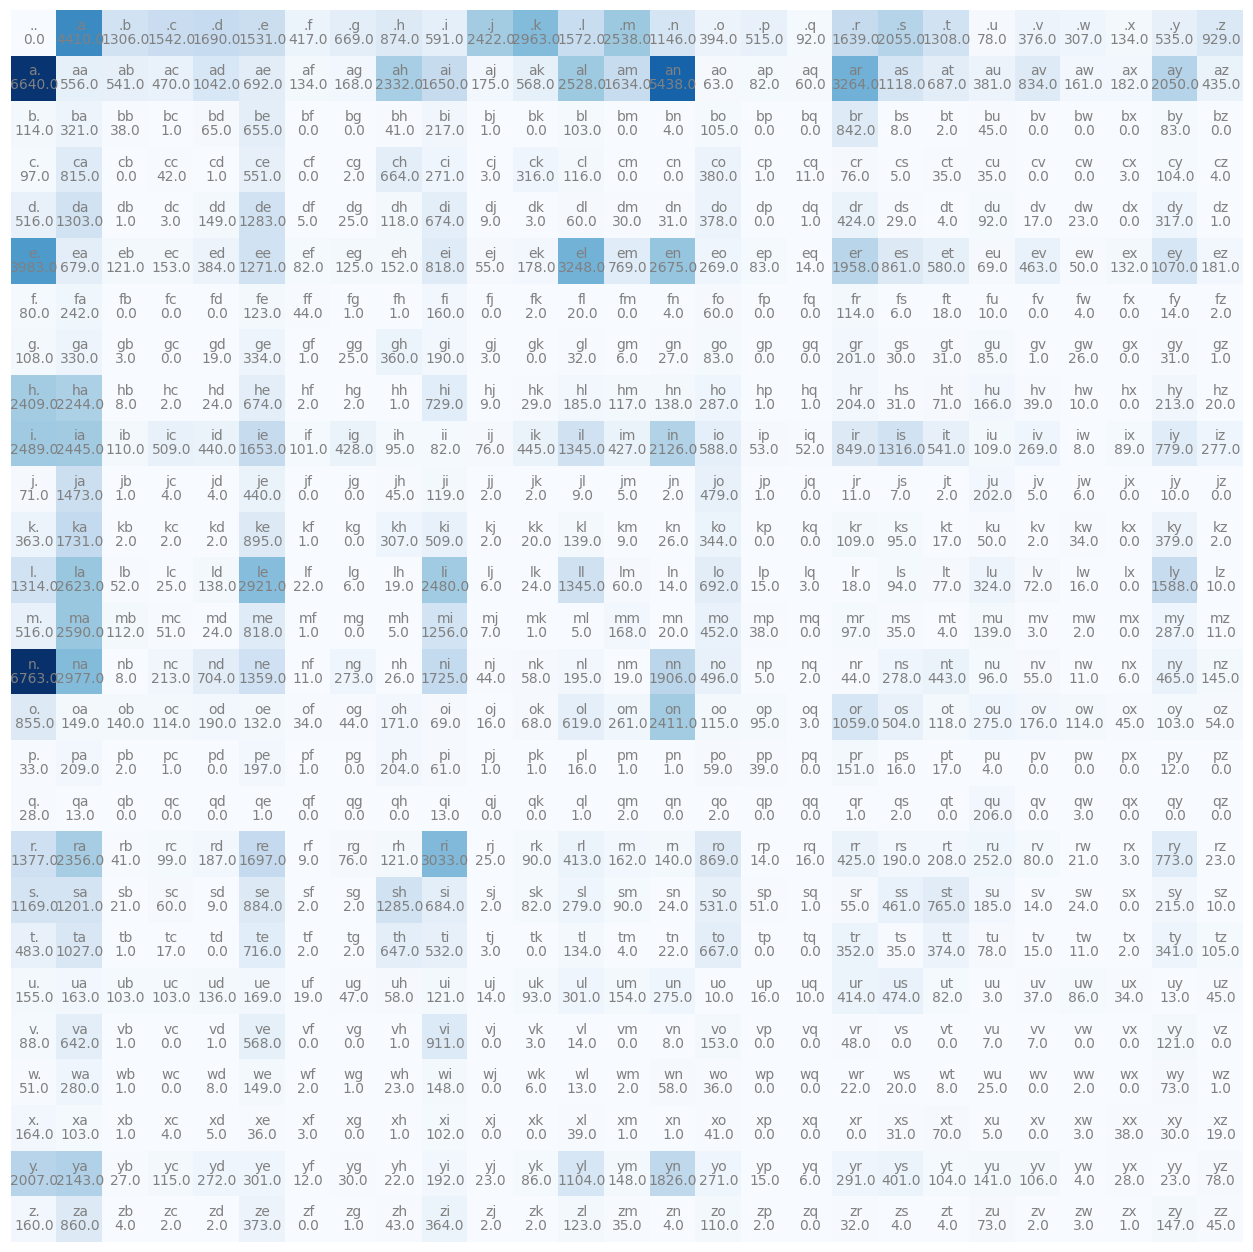

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")

for i in range(27):
    for j in range(27):
        chstr = i2s[i] + i2s[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{N[i, j].item()}", ha="center", va="top", color="gray")
plt.axis("off")

In [39]:
prob = N[0].float()
prob /= prob.sum()
prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [44]:
g = torch.Generator().manual_seed(2147483647)

p = torch.rand(3, generator=g)
p = p/p.sum()

tensor([0.6064, 0.3033, 0.0903])

In [46]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [50]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
i2s[idx]

'j'

Object `broadcasting` not found.


In [107]:
# TODO: read about broadcasting
P = (N + 1).float()
P /= P.sum(dim=1, keepdim=True)


In [108]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    idx = 0
    while True:
        # p = torch.ones(27) / 27.0
        idx = torch.multinomial(P[idx], num_samples=1, replacement=True, generator=g).item()
        out.append(i2s[idx])
        if idx == 0:
            break
    print("".join(out))

juwjdvdipkaqaz.
p.
cfaywecnzqfjiirltozcogsjgwzvudlhnpauyabilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumj.
pfytszwjhrjagq.
coreaysezocfkyjjabdiwejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhlpvhvccragr.
wdkhwfdztta.


In [ ]:
# idea: trigram; n-gram;

In [113]:
log_likelyhood = 0.0
n = 0
for w in ["mircea"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1, idx2 = s2i[ch1], s2i[ch2] 
        logprob = torch.log(P[idx1, idx2]).item()
        log_likelyhood += logprob
        n += 1
        print(f"{ch1}{ch2} : {P[idx1, idx2].item():.3f} {logprob:.3f}")

nll = - log_likelyhood
print(f"negative_log_likelyhood: {nll:.3f}")
print(f"{nll / n:.3f}")

.m : 0.039 -3.256
mi : 0.042 -3.159
ir : 0.037 -3.285
rc : 0.036 -3.324
ce : 0.041 -3.187
ea : 0.037 -3.299
a. : 0.043 -3.153
negative_log_likelyhood: 22.665
3.238


In [92]:
# TODO: maximum likelihood estimation (wiki)
# log-likelihood

0.037037037037037035

In [125]:
# create training set of bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]	
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1, idx2 = s2i[ch1], s2i[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [126]:
# torch.nn.functional.one_hot

torch.int64

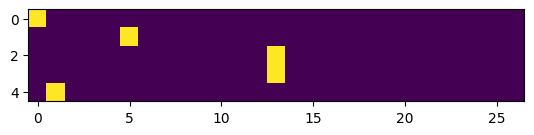

In [131]:
x_enc = F.one_hot(xs, num_classes=27)
x_enc.shape
plt.imshow(x_enc)